건강 평가 및 1 차 진료와의 연계 (Health Evaluation and Linkage to Primary Care)에 대한 임상 연구자료 발췌한 자료
###### −	연구목적: 건강 관련 여러가지 평가와 행동학적 동기부여 방법을 약물복용치료 프로그램 1 차 진료(일반치료)와 연계하고자 함 
###### −	대상자: (주치의가 없는) 알코올, 헤로인 또는 코카인 등의 약물복용자로, 클리닉 근처 거주자 혹은 노숙자 
###### −	무작위배정: 대상 환자들은 일반치료 (usual care)를 받거나 아니면 일반치료 외 추가적 간병 (HELP clinic)를 받게 됨  
###### −	연구기간: 피험자들은 약물치료 체류 기간 동안 기저시점(baseline)에서 인터뷰하고 추적조사(follow-up)를 하였다. 인터뷰는 2 년 동안 6 개월마다 실시되었다. 
###### −	자료설명: Table 1 
###### −	자료 결과는 크게 SF-36 Mental Component Score 부분과 Center for Epidemiologic Studies Depression scale (CESD) 결과로 나뉠 수 있다. 


In [125]:
import scipy.stats as stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

1.	HELP.CSV 를  불러들이는 프로그래밍을 해주세요. 

In [3]:
help_data=pd.read_csv('/Users/chosunghyun/Desktop/Python.proj/DataScience_code/statics/help.csv')

In [4]:
#원본 데이터 파악
help_data.head()

,id,pcs1,mcs1,cesd1,pcs2,mcs2,cesd2,pcs3,mcs3,cesd3,...,f1s,f1t,age,treat,pcs,mcs,cesd,female,substance,racegrp
0,1,54.225826,52.234798,7.0,NaN,NaN,NaN,52.061062,56.060101,8.0,...,3,2,37,1,58.413689,25.111990,49,0,cocaine,black
1,2,59.560657,41.726955,11.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,37,1,36.036942,26.670307,30,0,alcohol,white
2,3,58.457771,56.771305,14.0,NaN,NaN,NaN,NaN,NaN,NaN,...,2,0,26,0,74.806328,6.762923,39,0,heroin,black
3,4,46.609879,14.659246,44.0,57.560917,23.913162,NaN,NaN,NaN,NaN,...,0,1,39,0,61.931679,43.967880,15,1,heroin,white
4,5,31.416422,40.674210,26.0,44.833405,42.444687,27.0,25.026251,50.934769,15.0,...,3,3,32,0,37.345585,21.675755,39,0,cocaine,black


In [5]:
ds= help_data.copy()

In [6]:
ds.head()

,id,pcs1,mcs1,cesd1,pcs2,mcs2,cesd2,pcs3,mcs3,cesd3,...,f1s,f1t,age,treat,pcs,mcs,cesd,female,substance,racegrp
0,1,54.225826,52.234798,7.0,NaN,NaN,NaN,52.061062,56.060101,8.0,...,3,2,37,1,58.413689,25.111990,49,0,cocaine,black
1,2,59.560657,41.726955,11.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,37,1,36.036942,26.670307,30,0,alcohol,white
2,3,58.457771,56.771305,14.0,NaN,NaN,NaN,NaN,NaN,NaN,...,2,0,26,0,74.806328,6.762923,39,0,heroin,black
3,4,46.609879,14.659246,44.0,57.560917,23.913162,NaN,NaN,NaN,NaN,...,0,1,39,0,61.931679,43.967880,15,1,heroin,white
4,5,31.416422,40.674210,26.0,44.833405,42.444687,27.0,25.026251,50.934769,15.0,...,3,3,32,0,37.345585,21.675755,39,0,cocaine,black


In [7]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 42 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         453 non-null    int64  
 1   pcs1       246 non-null    float64
 2   mcs1       246 non-null    float64
 3   cesd1      246 non-null    float64
 4   pcs2       211 non-null    float64
 5   mcs2       211 non-null    float64
 6   cesd2      209 non-null    float64
 7   pcs3       248 non-null    float64
 8   mcs3       248 non-null    float64
 9   cesd3      248 non-null    float64
 10  pcs4       266 non-null    float64
 11  mcs4       266 non-null    float64
 12  cesd4      266 non-null    float64
 13  d1         453 non-null    int64  
 14  f1a        453 non-null    int64  
 15  f1b        453 non-null    int64  
 16  f1c        453 non-null    int64  
 17  f1d        453 non-null    int64  
 18  f1e        453 non-null    int64  
 19  f1f        453 non-null    int64  
 20  f1g       

In [8]:
type(ds)

pandas.core.frame.DataFrame

In [9]:
ds.values

array([[1, 54.22582626, 52.23479843, ..., 0, 'cocaine', 'black'],
       [2, 59.5606575, 41.72695541, ..., 0, 'alcohol', 'white'],
       [3, 58.4577713, 56.77130508, ..., 0, 'heroin', 'black'],
       ...,
       [460, nan, nan, ..., 1, 'heroin', 'white'],
       [462, nan, nan, ..., 0, 'cocaine', 'black'],
       [463, nan, nan, ..., 0, 'alcohol', 'white']], dtype=object)

In [10]:
ds.female

0      0
1      0
2      0
3      1
4      0
      ..
448    0
449    0
450    1
451    0
452    0
Name: female, Length: 453, dtype: int64

In [11]:
dataset1 = ds[['female']]

A.	성별(female)에 관련된 분석 시, 결과출력 될 때 0, 1 이 아닌 각각 Male, Female 로 출력을 위해 필요한 프로그래밍을 진행해주세요 

In [12]:
dataset1 = dataset1.female.map({0:'male',1:'female'})
dataset1.head()

0      male
1      male
2      male
3    female
4      male
Name: female, dtype: object

In [13]:
dataset=pd.DataFrame(dataset1)

In [14]:
type(dataset)
dataset

,female
0,male
1,male
2,male
3,female
4,male
...,...
448,male
449,male
450,female
451,male


B.	CESD에 대한 세부 문항 결과인 f1a-f1t의 결과값을 0-3 이 아닌, Table 1 아래 # 주석의 설명이 출력이 되게끔 프로그래밍 하세요
#: For each of the 20 items in HELP section F1 (CESD), respondents were asked to indicate how often they behaved this way during the past week
 (0 = rarely or none of the time, less than 1 day;
 1 = some or a little of the time, 1 or 2 days;
 2 = occasionally or a moderate amount of time, 3 or4 days; 
 3 = most or all of the time, 5{7 days); 
items f1d, f1h, f1l, and f1p were reverse coded. 


In [15]:
# dataset에 데이터 삽입 
i=1
for j in list('abcdefghijklmnopqrst'):
    col_name = 'f'+str(i)+j
    dataset[col_name] = ds[col_name].apply(lambda x:x)

In [16]:
"""
dataset['fla']=ds.f1a.apply(lambda x:x)
dataset['flb']=ds.f1b.apply(lambda x:x)
dataset['flc']=ds.f1c.apply(lambda x:x)
dataset['fld']=ds.f1d.apply(lambda x:x)
"""

"\ndataset['fla']=ds.f1a.apply(lambda x:x)\ndataset['flb']=ds.f1b.apply(lambda x:x)\ndataset['flc']=ds.f1c.apply(lambda x:x)\ndataset['fld']=ds.f1d.apply(lambda x:x)\n"

In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   female  453 non-null    object 
 1   f1a     453 non-null    int64  
 2   f1b     453 non-null    int64  
 3   f1c     453 non-null    int64  
 4   f1d     453 non-null    int64  
 5   f1e     453 non-null    int64  
 6   f1f     453 non-null    int64  
 7   f1g     452 non-null    float64
 8   f1h     453 non-null    int64  
 9   f1i     453 non-null    int64  
 10  f1j     451 non-null    float64
 11  f1k     453 non-null    int64  
 12  f1l     453 non-null    int64  
 13  f1m     452 non-null    float64
 14  f1n     452 non-null    float64
 15  f1o     453 non-null    int64  
 16  f1p     452 non-null    float64
 17  f1q     452 non-null    float64
 18  f1r     453 non-null    int64  
 19  f1s     453 non-null    int64  
 20  f1t     453 non-null    int64  
dtypes: float64(6), int64(14), object(1)
mem

In [18]:
"""
import string
al = list(string.ascii_lowercase)


i = 0
a = [0]
while i < 100 :
    a.append(i+1)
    i += 1

for x in a :
    for y in al:
        if x == 1:
            print('f'+str(x)+y)
"""

"\nimport string\nal = list(string.ascii_lowercase)\n\n\ni = 0\na = [0]\nwhile i < 100 :\n    a.append(i+1)\n    i += 1\n\nfor x in a :\n    for y in al:\n        if x == 1:\n            print('f'+str(x)+y)\n"

In [19]:
dataset

,female,f1a,f1b,f1c,f1d,f1e,f1f,f1g,f1h,f1i,...,f1k,f1l,f1m,f1n,f1o,f1p,f1q,f1r,f1s,f1t
0,male,3,2,3,0,2,3,3.0,0,2,...,3,0,1.0,2.0,2,2.0,2.0,3,3,2
1,male,3,2,0,3,3,2,0.0,0,3,...,3,0,0.0,3.0,0,0.0,0.0,2,0,0
2,male,3,2,3,0,2,2,1.0,3,2,...,1,0,1.0,3.0,2,0.0,0.0,3,2,0
3,female,0,0,1,3,2,2,1.0,3,0,...,1,2,2.0,2.0,0,NaN,2.0,0,0,1
4,male,3,0,3,3,3,3,1.0,3,3,...,3,2,2.0,3.0,0,3.0,3.0,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,male,2,2,1,2,2,2,3.0,2,0,...,2,2,2.0,1.0,1,1.0,0.0,1,2,1
449,male,3,3,3,0,3,2,1.0,0,0,...,3,0,3.0,0.0,0,0.0,1.0,1,1,1
450,female,2,3,3,3,2,2,0.0,3,1,...,1,1,1.0,1.0,1,3.0,3.0,3,0,3
451,male,1,0,2,3,0,0,0.0,3,0,...,2,3,0.0,3.0,0,3.0,0.0,3,0,0


In [20]:
# CESD에 대한 세부 문항 결과인 f1a-f1t의 결과값인 0-3 정수 혹은 실수형 데이터를  문자형으로 변환 
# loc 을 이용한 열 조건 레이블에 맞는 것들만 변환
index=1
labels=["~1","1or2","2or3","3~"]
for j in list('abcdefghijklmnopqrst'):
    col_name = 'f'+str(index)+j
    for i in range(4):
        dataset.loc[(dataset[col_name]==i),col_name] = labels[i]

In [21]:
dataset

,female,f1a,f1b,f1c,f1d,f1e,f1f,f1g,f1h,f1i,...,f1k,f1l,f1m,f1n,f1o,f1p,f1q,f1r,f1s,f1t
0,male,3~,2or3,3~,~1,2or3,3~,3~,~1,2or3,...,3~,~1,1or2,2or3,2or3,2or3,2or3,3~,3~,2or3
1,male,3~,2or3,~1,3~,3~,2or3,~1,~1,3~,...,3~,~1,~1,3~,~1,~1,~1,2or3,~1,~1
2,male,3~,2or3,3~,~1,2or3,2or3,1or2,3~,2or3,...,1or2,~1,1or2,3~,2or3,~1,~1,3~,2or3,~1
3,female,~1,~1,1or2,3~,2or3,2or3,1or2,3~,~1,...,1or2,2or3,2or3,2or3,~1,NaN,2or3,~1,~1,1or2
4,male,3~,~1,3~,3~,3~,3~,1or2,3~,3~,...,3~,2or3,2or3,3~,~1,3~,3~,3~,3~,3~
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,male,2or3,2or3,1or2,2or3,2or3,2or3,3~,2or3,~1,...,2or3,2or3,2or3,1or2,1or2,1or2,~1,1or2,2or3,1or2
449,male,3~,3~,3~,~1,3~,2or3,1or2,~1,~1,...,3~,~1,3~,~1,~1,~1,1or2,1or2,1or2,1or2
450,female,2or3,3~,3~,3~,2or3,2or3,~1,3~,1or2,...,1or2,1or2,1or2,1or2,1or2,3~,3~,3~,~1,3~
451,male,1or2,~1,2or3,3~,~1,~1,~1,3~,~1,...,2or3,3~,~1,3~,~1,3~,~1,3~,~1,~1


C.	같은 사람이 중복 입력이 되었는지를 확인하는 작업을 통해 있다면, 몇번(id) 환자들이 중복입력이 되었는지, 같은 사람이 맞는지를 제시하시오. 중복된 자료는 삭제하고 다음 분석을 진행해주세요

In [22]:
  # id 사람  , 데이터 넣기
dataset['id'] = ds['id'].apply(lambda x:x)

In [23]:
dataset

,female,f1a,f1b,f1c,f1d,f1e,f1f,f1g,f1h,f1i,...,f1l,f1m,f1n,f1o,f1p,f1q,f1r,f1s,f1t,id
0,male,3~,2or3,3~,~1,2or3,3~,3~,~1,2or3,...,~1,1or2,2or3,2or3,2or3,2or3,3~,3~,2or3,1
1,male,3~,2or3,~1,3~,3~,2or3,~1,~1,3~,...,~1,~1,3~,~1,~1,~1,2or3,~1,~1,2
2,male,3~,2or3,3~,~1,2or3,2or3,1or2,3~,2or3,...,~1,1or2,3~,2or3,~1,~1,3~,2or3,~1,3
3,female,~1,~1,1or2,3~,2or3,2or3,1or2,3~,~1,...,2or3,2or3,2or3,~1,NaN,2or3,~1,~1,1or2,4
4,male,3~,~1,3~,3~,3~,3~,1or2,3~,3~,...,2or3,2or3,3~,~1,3~,3~,3~,3~,3~,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,male,2or3,2or3,1or2,2or3,2or3,2or3,3~,2or3,~1,...,2or3,2or3,1or2,1or2,1or2,~1,1or2,2or3,1or2,454
449,male,3~,3~,3~,~1,3~,2or3,1or2,~1,~1,...,~1,3~,~1,~1,~1,1or2,1or2,1or2,1or2,455
450,female,2or3,3~,3~,3~,2or3,2or3,~1,3~,1or2,...,1or2,1or2,1or2,1or2,3~,3~,3~,~1,3~,460
451,male,1or2,~1,2or3,3~,~1,~1,~1,3~,~1,...,3~,~1,3~,~1,3~,~1,3~,~1,~1,462


In [24]:
#공란 체크
dataset['id'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
448    False
449    False
450    False
451    False
452    False
Name: id, Length: 453, dtype: bool

In [25]:
#중복값 따로 추출후 저장
duplicatedatasetdf = dataset[dataset['id'].duplicated()]
duplicatedatasetdf

,female,f1a,f1b,f1c,f1d,f1e,f1f,f1g,f1h,f1i,...,f1l,f1m,f1n,f1o,f1p,f1q,f1r,f1s,f1t,id


In [26]:
#중복 체크+유니크한 값 남기고 나머지 제거
dataset['id'].drop_duplicates()

0        1
1        2
2        3
3        4
4        5
      ... 
448    454
449    455
450    460
451    462
452    463
Name: id, Length: 453, dtype: int64

D.	연구에 참여한 대상자들의 인구학적 정보들이 무작위배정 그룹 간(treat)에 발란스가 유지되었는지를 확인하기 위해 연령(age), 성별(female), 인종(racegrp) 비교하고자 한다. 이에 대한 프로그래밍 하세요. 비교하고자 하는 측도는 자료의 타입에 맞는 적절한 측도를 선택하여 나타내세요

In [27]:
# data 넣기
dataset['treat'] = ds['treat'].apply(lambda x:x)
dataset['age'] = ds['age'].apply(lambda x:x)
dataset['racegrp'] = ds['racegrp'].apply(lambda x:x)

In [28]:
dataset1 = dataset.copy()
dataset1

,female,f1a,f1b,f1c,f1d,f1e,f1f,f1g,f1h,f1i,...,f1o,f1p,f1q,f1r,f1s,f1t,id,treat,age,racegrp
0,male,3~,2or3,3~,~1,2or3,3~,3~,~1,2or3,...,2or3,2or3,2or3,3~,3~,2or3,1,1,37,black
1,male,3~,2or3,~1,3~,3~,2or3,~1,~1,3~,...,~1,~1,~1,2or3,~1,~1,2,1,37,white
2,male,3~,2or3,3~,~1,2or3,2or3,1or2,3~,2or3,...,2or3,~1,~1,3~,2or3,~1,3,0,26,black
3,female,~1,~1,1or2,3~,2or3,2or3,1or2,3~,~1,...,~1,NaN,2or3,~1,~1,1or2,4,0,39,white
4,male,3~,~1,3~,3~,3~,3~,1or2,3~,3~,...,~1,3~,3~,3~,3~,3~,5,0,32,black
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,male,2or3,2or3,1or2,2or3,2or3,2or3,3~,2or3,~1,...,1or2,1or2,~1,1or2,2or3,1or2,454,1,33,white
449,male,3~,3~,3~,~1,3~,2or3,1or2,~1,~1,...,~1,~1,1or2,1or2,1or2,1or2,455,1,49,white
450,female,2or3,3~,3~,3~,2or3,2or3,~1,3~,1or2,...,1or2,3~,3~,3~,~1,3~,460,0,39,white
451,male,1or2,~1,2or3,3~,~1,~1,~1,3~,~1,...,~1,3~,~1,3~,~1,~1,462,0,59,black


age: 19~ 60 

racegrp: black,white,hispanic,other  

treat 1 or 0 >  기준

분포 파악.

In [29]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 25 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   female   453 non-null    object
 1   f1a      453 non-null    object
 2   f1b      453 non-null    object
 3   f1c      453 non-null    object
 4   f1d      453 non-null    object
 5   f1e      453 non-null    object
 6   f1f      453 non-null    object
 7   f1g      452 non-null    object
 8   f1h      453 non-null    object
 9   f1i      453 non-null    object
 10  f1j      451 non-null    object
 11  f1k      453 non-null    object
 12  f1l      453 non-null    object
 13  f1m      452 non-null    object
 14  f1n      452 non-null    object
 15  f1o      453 non-null    object
 16  f1p      452 non-null    object
 17  f1q      452 non-null    object
 18  f1r      453 non-null    object
 19  f1s      453 non-null    object
 20  f1t      453 non-null    object
 21  id       453 non-null    int64 
 22  tr

In [30]:
#treat 을 기준으로 각각 만족 하는 age 와 racegrp를 같이 호출하여 적제 
dataset_t0 = dataset1.loc[(dataset1['treat'] == 0) & (dataset1['age']) &(dataset1['racegrp']),['treat','age','racegrp']] 
dataset_t0

,treat,age,racegrp
3,0,39,white
6,0,49,black
16,0,35,black
17,0,29,other
19,0,27,black
...,...,...,...
445,0,25,black
446,0,31,hispanic
450,0,39,white
451,0,59,black


In [31]:
dataset_t1 = dataset1.loc[(dataset1['treat'] == 1) & (dataset1['age']) &(dataset1['racegrp']),['treat','age','racegrp']] 
dataset_t1

,treat,age,racegrp
0,1,37,black
1,1,37,white
5,1,47,black
9,1,39,white
18,1,27,white
...,...,...,...
439,1,39,white
442,1,37,hispanic
443,1,33,hispanic
448,1,33,white


나이 비교 평균으로/ 중앙값/

In [32]:
dataset_t0['age'].mean()

36.96992481203007

In [33]:
dataset_t1['age'].mean()

36.064516129032256

In [34]:
dataset_t0['age'].median()

35.0

In [35]:
dataset_t1.age.median()

36.0

In [36]:
#정규화 1 . 가우시안 분포 , 2 .분모는 데이터의 최댓값과 최솟값의 차로 분자는 데이터에서 최솟값을 뺀 값으로.
min_x = dataset_t0.age-dataset_t0.age.min()
min_max =dataset_t0.age.max()-dataset_t0.age.min() 
dataset_t0.age= min_x/min_max

In [37]:
#인종 숫자화 
#dataset.loc[(dataset[col_name]==i),col_name] = labels[i]

dataset_t0.loc[(dataset_t0['racegrp']=='black'),'racegrp']=1
dataset_t0.loc[(dataset_t0['racegrp']=='white'),'racegrp']=2
dataset_t0.loc[(dataset_t0['racegrp']=='hispanic'),'racegrp']=3
dataset_t0.loc[(dataset_t0['racegrp']=='other'),'racegrp']=4

In [38]:
#인종 숫자화 
#dataset.loc[(dataset[col_name]==i),col_name] = labels[i]

dataset_t1.loc[(dataset_t1['racegrp']=='black'),'racegrp']=1
dataset_t1.loc[(dataset_t1['racegrp']=='white'),'racegrp']=2
dataset_t1.loc[(dataset_t1['racegrp']=='hispanic'),'racegrp']=3
dataset_t1.loc[(dataset_t1['racegrp']=='other'),'racegrp']=4

In [39]:
dataset_t0.racegrp.value_counts()

1    60
2    48
3    15
4    10
Name: racegrp, dtype: int64

In [40]:
dataset_t1.racegrp.value_counts()

1    59
2    43
3    17
4     5
Name: racegrp, dtype: int64

others 즉 3인종이 아닌 인종의 수가 2배 차이나는걸 확인 가능하다.

E.
그룹 간에 CESD score 변화량을 비교하기 위해서 24개월 시점에서의 CESD score 와 기저 (baseline) 시점에서의 CESD score의 차이를 나타내는 변수를 추가하고, 이에 대해 그룹 간 기술통계를 비교하여 제시하시오

In [41]:
# cesd1 ~cesd4 , cesd data accpept
#결측치 0 으로 채움
ds['cesd']=ds['cesd'].fillna(0)
ds['cesd1']=ds['cesd1'].fillna(0)
ds['cesd2']=ds['cesd2'].fillna(0)
ds['cesd3']=ds['cesd3'].fillna(0)
ds['cesd4']=ds['cesd4'].fillna(0)

In [42]:
ds.cesd1.isnull().sum()

0

In [43]:
#ds에서 특정 칼럼들만 포함해서 추출 : 초기
cesd_data= ds[['cesd','cesd1','cesd2','cesd3','cesd4']]

In [44]:
cesd_data

,cesd,cesd1,cesd2,cesd3,cesd4
0,49,7.0,0.0,8.0,5.0
1,30,11.0,0.0,0.0,0.0
2,39,14.0,0.0,0.0,49.0
3,15,44.0,0.0,0.0,20.0
4,39,26.0,27.0,15.0,28.0
...,...,...,...,...,...
448,28,0.0,0.0,0.0,0.0
449,37,0.0,0.0,0.0,0.0
450,28,0.0,0.0,0.0,0.0
451,11,0.0,0.0,0.0,0.0


In [57]:
# differ = cesd4 - cesd(baseline)
cesd_data['differ'] = 100   # 초기값 100 설정, 
cesd_data.head()

,cesd,cesd1,cesd2,cesd3,cesd4,differ
0,49,7.0,0.0,8.0,5.0,100
1,30,11.0,0.0,0.0,0.0,100
2,39,14.0,0.0,0.0,49.0,100
3,15,44.0,0.0,0.0,20.0,100
4,39,26.0,27.0,15.0,28.0,100


In [61]:
cesd_data.differ = cesd_data.cesd4-cesd_data.cesd
cesd_data.head(7)

,cesd,cesd1,cesd2,cesd3,cesd4,differ
0,49,7.0,0.0,8.0,5.0,-44.0
1,30,11.0,0.0,0.0,0.0,-30.0
2,39,14.0,0.0,0.0,49.0,10.0
3,15,44.0,0.0,0.0,20.0,5.0
4,39,26.0,27.0,15.0,28.0,-11.0
5,6,23.0,0.0,0.0,0.0,-6.0
6,52,0.0,47.0,54.0,52.0,0.0


In [64]:
#treat 그룹간비교
cesd_data['treat'] = ds['treat'].apply(lambda x:x)
cesd_data.head()

,cesd,cesd1,cesd2,cesd3,cesd4,differ,treat
0,49,7.0,0.0,8.0,5.0,-44.0,1
1,30,11.0,0.0,0.0,0.0,-30.0,1
2,39,14.0,0.0,0.0,49.0,10.0,0
3,15,44.0,0.0,0.0,20.0,5.0,0
4,39,26.0,27.0,15.0,28.0,-11.0,0


In [74]:
cesd_data_t1=cesd_data[cesd_data['treat'] == 1]
cesd_data_t1.head()

,cesd,cesd1,cesd2,cesd3,cesd4,differ,treat
0,49,7.0,0.0,8.0,5.0,-44.0,1
1,30,11.0,0.0,0.0,0.0,-30.0,1
5,6,23.0,0.0,0.0,0.0,-6.0,1
7,32,18.0,0.0,25.0,0.0,-32.0,1
9,46,37.0,47.0,0.0,0.0,-46.0,1


In [73]:
cesd_data_t0=cesd_data[cesd_data['treat'] == 0]
cesd_data_t0.head()

,cesd,cesd1,cesd2,cesd3,cesd4,differ,treat
2,39,14.0,0.0,0.0,49.0,10.0,0
3,15,44.0,0.0,0.0,20.0,5.0,0
4,39,26.0,27.0,15.0,28.0,-11.0,0
6,52,0.0,47.0,54.0,52.0,0.0,0
8,50,33.0,0.0,35.0,27.0,-23.0,0


In [71]:
cesd_data_t0.differ.describe()

count    228.000000
mean     -21.460526
std       17.725097
min      -58.000000
25%      -35.000000
50%      -23.000000
75%       -8.000000
max       26.000000
Name: differ, dtype: float64

In [72]:
cesd_data_t1.differ.describe()

count    225.000000
mean     -20.573333
std       17.914858
min      -57.000000
25%      -34.000000
50%      -21.000000
75%       -6.000000
max       19.000000
Name: differ, dtype: float64

위 Describe을 이용해서 확인하 바 treat 간 cesd 의 변화가 없다.

F.	CESD score 결과를 살펴봤을 때 프로그램의 효과가 주요복용약물(substance)에 따라 다른지를 비교할 수 있는 프로그래밍과 결과를 제시하시오


In [75]:
cesd_data['substance'] = ds['substance'].apply(lambda x:x)

In [76]:
cesd_data.head()

,cesd,cesd1,cesd2,cesd3,cesd4,differ,treat,substance
0,49,7.0,0.0,8.0,5.0,-44.0,1,cocaine
1,30,11.0,0.0,0.0,0.0,-30.0,1,alcohol
2,39,14.0,0.0,0.0,49.0,10.0,0,heroin
3,15,44.0,0.0,0.0,20.0,5.0,0,heroin
4,39,26.0,27.0,15.0,28.0,-11.0,0,cocaine


In [90]:
#substance 별 데이터 나누고 >  differ. 비교
cesd_data_sa=cesd_data[cesd_data['substance'] == 'alcohol']
cesd_data_sc=cesd_data[cesd_data['substance'] == 'cocaine']
cesd_data_sh=cesd_data[cesd_data['substance'] == 'heroin']

귀무 가설 H0:  3 그룹간 differ  에 대한 차이가 없다.

In [92]:
plot_data = [cesd_data_sa.differ, cesd_data_sc.differ,cesd_data_sh.differ]

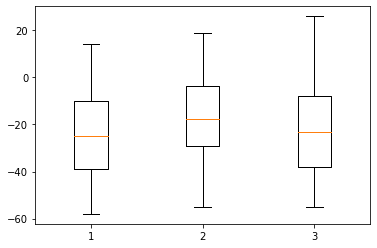

In [93]:
ax = plt.boxplot(plot_data)
plt.show()

In [95]:
F_statistic, pVal = stats.f_oneway(cesd_data_sa.differ, cesd_data_sc.differ,cesd_data_sh.differ)
print('Altman 910 데이터의 일원분산분석 결과 : F={0:.1f}, p={1:.5f}'.format(F_statistic, pVal))
if pVal < 0.05:
    print('P-value 값이 충분히 작음')

Altman 910 데이터의 일원분산분석 결과 : F=7.0, p=0.00103
P-value 값이 충분히 작음


유의수준 5퍼보다 유의 확률이 작으니 귀무 가설을 기각한다.
따라서 급룹간 differ 측성의 차이가 없다고 할수 없다.

substance 에따라 cesd 의 차이가 있다.

In [96]:
cesd_data_sa.differ.describe()

count    177.000000
mean     -23.887006
std       17.398364
min      -58.000000
25%      -39.000000
50%      -25.000000
75%      -10.000000
max       14.000000
Name: differ, dtype: float64

In [97]:
 cesd_data_sc.differ.describe()

count    152.000000
mean     -16.796053
std       16.719477
min      -55.000000
25%      -29.000000
50%      -17.500000
75%       -3.750000
max       19.000000
Name: differ, dtype: float64

In [98]:
cesd_data_sh.differ.describe()

count    124.000000
mean     -22.104839
std       18.805733
min      -55.000000
25%      -38.000000
50%      -23.000000
75%       -7.750000
max       26.000000
Name: differ, dtype: float64

A.	자료에서 나이(age)와 입원경력(d1), 두가지 sf-36 결과 (mcs, pcs)에서 자료에 적합하지 않는 자료가 있는지를 살펴보는 프로그래밍을 하고, 적합하지 않은 자료는 결측치 처리하세요 . 

In [114]:
#ds에서 특정 칼럼만 포함.
dataset = ds[['age','d1','mcs','pcs']]
dataset.head()

,age,d1,mcs,pcs
0,37,3,25.111990,58.413689
1,37,22,26.670307,36.036942
2,26,0,6.762923,74.806328
3,39,2,43.967880,61.931679
4,32,12,21.675755,37.345585


In [115]:
#결측치 
dataset.isnull().sum()
# 있으면  0 으로
dataset=dataset.fillna(0)
dataset.head()

,age,d1,mcs,pcs
0,37,3,25.111990,58.413689
1,37,22,26.670307,36.036942
2,26,0,6.762923,74.806328
3,39,2,43.967880,61.931679
4,32,12,21.675755,37.345585


C.  연령을 (19-30, 31-40, 41-50,51-60) 기준으로 그룹화 하여 변수추가 (agegrp) 하세요

In [116]:
dataset.age.describe()

count    453.000000
mean      35.653422
std        7.710266
min       19.000000
25%       30.000000
50%       35.000000
75%       40.000000
max       60.000000
Name: age, dtype: float64

In [117]:
# 그룹 화 19-30 , 31-40 ,41-50,51-60

dataset['agegrp']=0
dataset.loc[dataset.age <=30,'agegrp'] = 1
dataset.loc[(dataset['age'] >30)&(dataset['age'] <= 40),'agegrp'] = 2
dataset.loc[(dataset['age'] >40)&(dataset['age'] <= 50),'agegrp'] = 3
dataset.loc[(dataset['age'] >50)&(dataset['age'] <= 60),'agegrp'] = 4
dataset

,age,d1,mcs,pcs,agegrp
0,37,3,25.111990,58.413689,2
1,37,22,26.670307,36.036942,2
2,26,0,6.762923,74.806328,1
3,39,2,43.967880,61.931679,2
4,32,12,21.675755,37.345585,2
...,...,...,...,...,...
448,33,1,41.943066,56.968681,2
449,49,0,62.175503,57.253838,3
450,39,0,33.434536,40.045715,2
451,59,2,54.424816,53.732044,4


D.	연령그룹(agegrp)에 따라 주요복용약물 (substance) 는 어떻게 분포되어있는지 제시하시오 

In [120]:
# agegrp 별로 데이터를 나눈후 약물 복용 분포 분석 >> 기초 통계 비빔
# agegrp 와 substance를 동시에 분포 파악  >>  cross table. scatter 
dataset.substance= ds['substance'].apply(lambda x:x)

In [121]:
dataset.head()

,age,d1,mcs,pcs,agegrp,substance
0,37,3,25.111990,58.413689,2,cocaine
1,37,22,26.670307,36.036942,2,alcohol
2,26,0,6.762923,74.806328,1,heroin
3,39,2,43.967880,61.931679,2,heroin
4,32,12,21.675755,37.345585,2,cocaine


In [124]:
dataset_size = dataset.pivot_table(index="agegrp", columns="substance", aggfunc="size")
dataset_size

substance,alcohol,cocaine,heroin
agegrp,,,
1,25,41,50
2,89,88,47
3,52,20,25
4,11,3,2


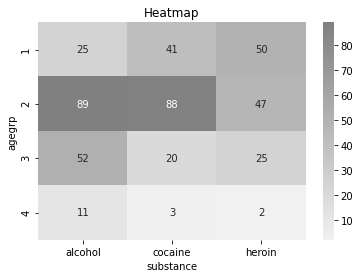

In [126]:
sns.heatmap(dataset_size,cmap=sns.light_palette('gray',as_cmap=True) ,annot=True,fmt = 'd')
plt.title("Heatmap")
plt.show()

E.	주요복용약물(substance) 별로 SF-36 결과들의 기술통계를 제시하시오

In [128]:
# substance 별로cut and sf - 36 result des

In [130]:
data_sa=dataset[dataset['substance'] == 'alcohol']
data_sc=dataset[dataset['substance'] == 'cocaine']
data_sh=dataset[dataset['substance'] == 'heroin']

,age,d1,mcs,pcs,agegrp,substance
2,26,0,6.762923,74.806328,1,heroin
3,39,2,43.967880,61.931679,2,heroin
9,39,4,36.143761,22.610598,2,heroin
10,34,0,43.974678,60.079155,2,heroin
15,28,6,29.799828,44.776512,1,heroin


In [133]:
#alchol substance 
data_sa[['mcs','pcs']].describe()

,mcs,pcs
count,177.000000,177.000000
mean,31.855353,46.829588
std,12.798661,11.250074
min,7.226597,14.074291
25%,21.460621,38.196178
50%,28.469273,47.363525
75%,41.360710,56.899628
max,62.175503,68.123955


In [134]:
#cocain sub
data_sc[['mcs','pcs']].describe()

,mcs,pcs
count,152.000000,152.000000
mean,34.150335,51.261612
std,13.418648,10.293218
min,7.938221,23.482084
25%,24.134239,44.627618
50%,32.130944,53.518581
75%,43.998566,58.326977
max,62.031616,71.628555


In [135]:
#herionsub
data_sh[['mcs','pcs']].describe()

,mcs,pcs
count,124.000000,124.000000
mean,28.389411,45.849898
std,11.482394,9.821840
min,6.762923,21.919056
25%,19.981861,39.549202
50%,27.523427,46.396118
75%,34.401465,52.445037
max,60.542084,74.806328
